In [33]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt


#ESCOLHA DE MODELO REGRESSIVO
from pycaret.regression import *

df_houses = pd.read_csv('teste_indicium_precificacao.csv')


# Alterando tipo de dado da variável ultima_review para o formato de data
df_houses['ultima_review'] = pd.to_datetime(df_houses['ultima_review']).copy()


df_houses['ultima_review'] = df_houses['ultima_review'].fillna(0)
df_houses['reviews_por_mes'] = df_houses['reviews_por_mes'].fillna(0)
df_houses = df_houses.dropna()

df_houses.info()

print('\nValores únicos das variáveis')
print(' id: ',df_houses.id.nunique())
print(' nome: ',df_houses.nome.nunique())
print(' host_id: ',df_houses.host_id.nunique())
print(' host_name: ',df_houses.host_name.nunique())

As variáveis id, nome, host_id, são removidas por servirem somente para identificação dos serviços prestados
sendo irrelevantes como variáveis explicativas.

O processo para seleção de vairáveis a ser utilizado é o Feature Importance .

In [2]:
# MODELO 0
print('\nMODELO 0\n')

reg_model = setup(data=df_houses.drop(columns=['id','nome','host_id']), 
                    target= 'price', session_id = 987)

best_model = compare_models(n_select=1)


,Description,Value
0,Session id,987
1,Target,price
2,Target type,Regression
3,Original data shape,"(48857, 13)"
4,Transformed data shape,"(48857, 19)"
5,Transformed train set shape,"(34199, 19)"
6,Transformed test set shape,"(14658, 19)"
7,Numeric features,7
8,Categorical features,5
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,65.8043,44606.2901,209.0614,0.1568,0.5079,0.4561,0.6070
et,Extra Trees Regressor,64.9623,45304.9024,210.7652,0.1431,0.4965,0.4494,4.0590
xgboost,Extreme Gradient Boosting,66.9257,46271.2630,213.1987,0.1191,0.5270,0.4644,0.4720
rf,Random Forest Regressor,66.2540,46789.4270,214.6995,0.1090,0.5042,0.4636,11.1250
huber,Huber Regressor,62.3755,47498.4808,215.8416,0.1052,0.5098,0.3884,0.3590
gbr,Gradient Boosting Regressor,67.5545,47521.6124,216.2770,0.0941,0.5247,0.4835,2.4420
lr,Linear Regression,81.3892,48243.9599,217.8796,0.0850,0.7363,0.6681,0.6920
ridge,Ridge Regression,81.3877,48244.3243,217.8804,0.0850,0.7359,0.6680,0.1560
lar,Least Angle Regression,81.4930,48254.3305,217.9075,0.0848,0.7398,0.6693,0.1700
br,Bayesian Ridge,81.4160,48266.6392,217.9307,0.0846,0.7339,0.6686,0.1750


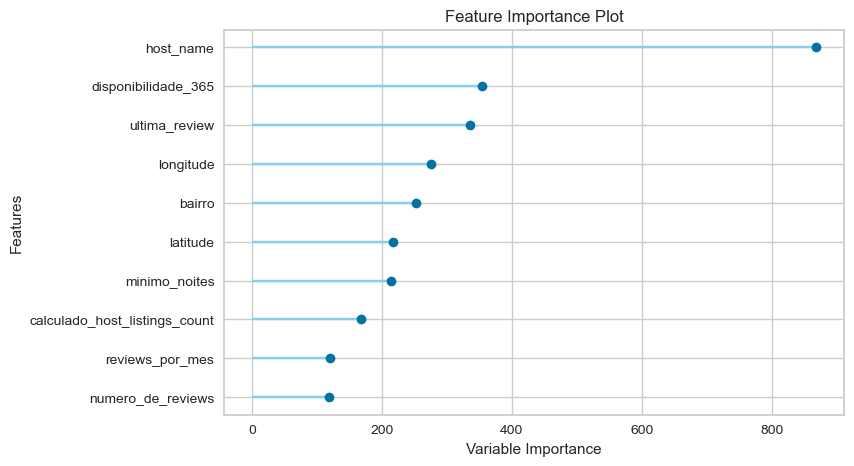

In [3]:
plot_model(best_model, plot = 'feature')

In [4]:
# MODELO 1
print('\nMODELO 1\n')

reg_model = setup(data=df_houses.drop(columns=['id','nome','host_id']), 
                    target= 'price', session_id = 987, normalize= True, 
                    normalize_method='zscore', transformation=True)

best_model = compare_models(n_select=1)


,Description,Value
0,Session id,987
1,Target,price
2,Target type,Regression
3,Original data shape,"(48857, 13)"
4,Transformed data shape,"(48857, 19)"
5,Transformed train set shape,"(34199, 19)"
6,Transformed test set shape,"(14658, 19)"
7,Numeric features,7
8,Categorical features,5
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,65.8520,44834.9946,209.7508,0.1499,0.5081,0.4572,0.9360
et,Extra Trees Regressor,65.2677,45359.8608,210.4174,0.1438,0.4987,0.4503,4.0720
rf,Random Forest Regressor,66.4532,46108.3534,212.9604,0.1232,0.5057,0.4661,9.7450
xgboost,Extreme Gradient Boosting,67.3444,46282.6957,213.1257,0.1231,0.5283,0.4685,0.7330
en,Elastic Net,73.1759,46712.9649,214.0984,0.1192,0.5858,0.5833,0.4890
gbr,Gradient Boosting Regressor,67.4799,46591.6813,214.2078,0.1141,0.5244,0.4824,2.4630
knn,K Neighbors Regressor,65.7465,46849.5761,214.3018,0.1135,0.5009,0.4264,0.7380
br,Bayesian Ridge,78.2197,47110.1843,215.1140,0.1100,0.6806,0.6396,0.4870
ridge,Ridge Regression,78.2925,47119.8005,215.1375,0.1098,0.6819,0.6405,0.5340
lr,Linear Regression,78.3024,47119.9521,215.1370,0.1098,0.6815,0.6407,0.3300


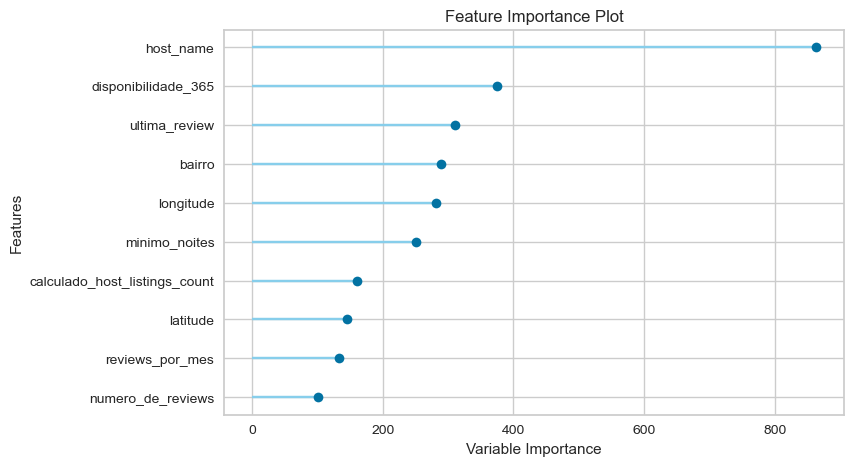

In [5]:
plot_model(best_model, plot = 'feature')

#### Após testar os modelos de número 0 e 1, conclui-se que o modelo 0, sem aplicar técnicas de normalização, possui um valor de R2 superior, modelo Light Gradient Boosting Machine de 0,1568. Usando-o como base para aprimoramento na seleção das melhores variáveis a serem utilizadas.

In [6]:
# MODELO 2
print('\nMODELO 2\n')

modelo_aprimorado = df_houses[['host_name','longitude','minimo_noites',
                     'ultima_review', 'disponibilidade_365',
                     'bairro', 'price','latitude']]

reg_model = setup(data=modelo_aprimorado, target= 'price', session_id=987)

best_model = compare_models(n_select=1)


,Description,Value
0,Session id,987
1,Target,price
2,Target type,Regression
3,Original data shape,"(48857, 8)"
4,Transformed data shape,"(48857, 8)"
5,Transformed train set shape,"(34199, 8)"
6,Transformed test set shape,"(14658, 8)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,79.0920,48062.8386,217.3097,0.0870,0.6258,0.6379,0.6500
huber,Huber Regressor,73.0837,49395.1131,220.2448,0.0673,0.6009,0.5183,0.1650
xgboost,Extreme Gradient Boosting,79.8516,49266.5368,220.2362,0.0596,0.6359,0.6411,0.4070
gbr,Gradient Boosting Regressor,79.7534,49530.6189,220.8132,0.0578,0.6328,0.6561,1.9380
rf,Random Forest Regressor,79.1074,49611.8249,221.5526,0.0471,0.6231,0.6491,7.0960
omp,Orthogonal Matching Pursuit,84.4726,51030.9048,223.7012,0.0386,0.6757,0.7307,0.1160
lr,Linear Regression,88.4700,50664.8248,223.3707,0.0377,0.7229,0.7446,0.6170
ridge,Ridge Regression,88.4707,50665.2813,223.3717,0.0377,0.7229,0.7446,0.1230
lar,Least Angle Regression,88.4700,50664.8248,223.3707,0.0377,0.7229,0.7446,0.1190
br,Bayesian Ridge,88.5420,50688.5639,223.4206,0.0373,0.7224,0.7456,0.1200


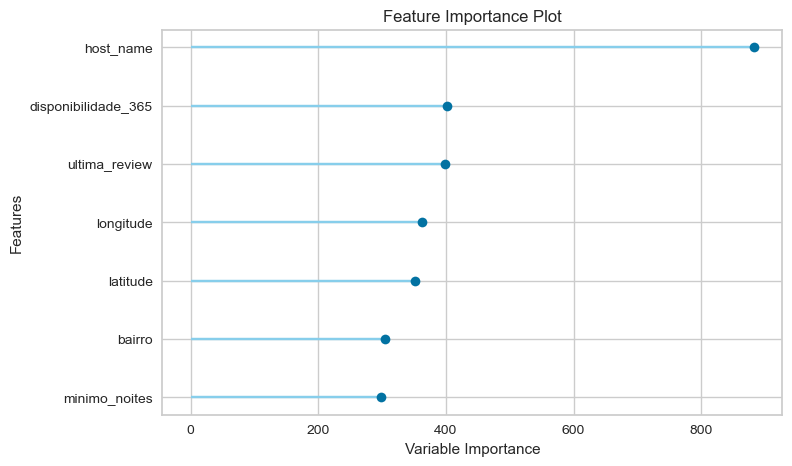

In [7]:
plot_model(best_model, plot = 'feature')

In [9]:
# MODELO 3
modelo_aprimorado = df_houses[['host_name','longitude','minimo_noites',
                     'ultima_review', 'disponibilidade_365',
                     'bairro', 'price','latitude']]

reg_model = setup(data=modelo_aprimorado, target= 'price', session_id=987,
                    normalize= True, normalize_method='zscore', transformation=True)

best_model = compare_models(n_select=1)

,Description,Value
0,Session id,987
1,Target,price
2,Target type,Regression
3,Original data shape,"(48857, 8)"
4,Transformed data shape,"(48857, 8)"
5,Transformed train set shape,"(34199, 8)"
6,Transformed test set shape,"(14658, 8)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,79.1936,48242.5592,217.8802,0.0804,0.6280,0.6408,0.5640
en,Elastic Net,83.1437,49051.1825,219.5455,0.0727,0.6737,0.7420,0.3420
knn,K Neighbors Regressor,80.3938,49461.1610,220.1391,0.0643,0.6379,0.6291,0.4650
huber,Huber Regressor,73.5063,49801.7099,221.1785,0.0592,0.6042,0.5281,0.3620
lasso,Lasso Regression,87.5835,49696.9370,221.0907,0.0587,0.7338,0.7755,0.3720
llar,Lasso Least Angle Regression,87.5835,49696.9496,221.0907,0.0587,0.7338,0.7755,0.3490
br,Bayesian Ridge,88.0204,49738.7807,221.1940,0.0577,0.7409,0.7796,0.3410
lar,Least Angle Regression,88.0465,49743.8594,221.2059,0.0576,0.7414,0.7798,0.3300
lr,Linear Regression,88.0465,49743.8594,221.2059,0.0576,0.7414,0.7798,0.3320
ridge,Ridge Regression,88.0458,49743.7390,221.2056,0.0576,0.7414,0.7798,0.3700


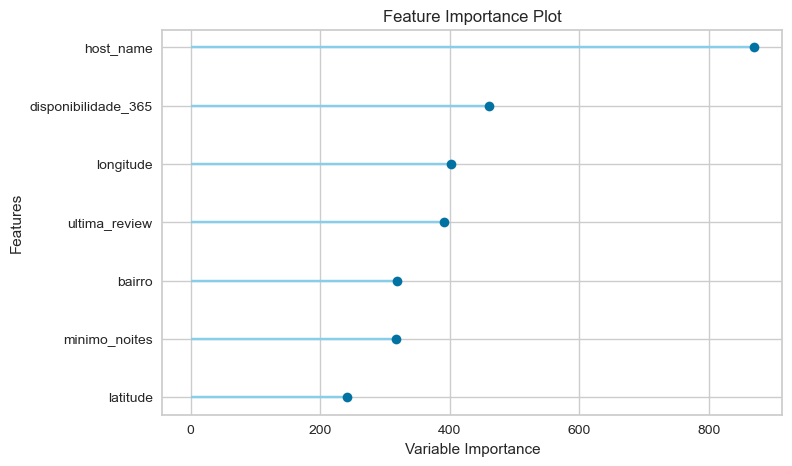

In [34]:
plot_model(best_model, plot = 'feature')

Ao avaliar os modelos aprimorados, modelo 2, Light Gradient Boosting Machine, apresenta um R2 de 0,087 contra 0,0804 do modelo 3. Assim conclui-se que o melhor modelo a ser utilizado é o Modelo 2 com as vairáveis host_name, longitude, minimo_noites, ultima_review, disponibilidade_365, bairro e latitude.

In [18]:
save_model(best_model,'LH_CD_MODEL_HOUSE_PRICE')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['longitude', 'minimo_noites',
                                              'disponibilidade_365',
                                              'latitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['host_name', 'ultima_review',
                                              'bairro'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  Tran...'host_name', 'ultima_review',
                                              'bairro'],
                                     transformer=TargetEncoder(cols=['host_name',
                                                                     'ultima_review',
                                                                    

Gerando o valor predito com as informações das variáveis disponibilisado

In [32]:
descobrir_preco = pd.DataFrame({'id': [2595], 'nome': ['Skylit Midtown Castle'], 'host_id': [2845],
                                'host_name': ['Jennifer'],'bairro_group': ['Manhattan'],
                                'bairro': ['Midtown'], 'latitude': [40.75362], 'longitude': [-73.98377],
                                'room_type': ['Entire home/apt'], 'price': [225], 'minimo_noites': [1],
                                'numero_de_reviews': [45], 'ultima_review': ['2019-05-21'],
                                'reviews_por_mes': [0.38], 'calculado_host_listings_count': [2],
                                'disponibilidade_365': [355]}
                              )

prediction = predict_model(best_model, data = descobrir_preco[['host_name', 'longitude', 'minimo_noites',
                                                                'ultima_review','disponibilidade_365',
                                                                'bairro', 'latitude']])

print('Preço predito $',prediction['prediction_label'].values[0].round(2))


Preço predito $ 275.86
